In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [61]:
# format style
plt.style.use('fivethirtyeight')
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=18)

In [3]:
f = 'data/bldg_insp/insp_viol.csv'
# number of observations
n_lines = sum(1 for line in open(f))
n_lines

380521

In [4]:
# random sample
pct = 3
size = int(n_lines * pct/100)
# row indicies to skip
skip_idx = random.sample(range(1, n_lines), n_lines - size)
df = pd.read_csv(f, index_col=0, skiprows=skip_idx)
df.head()

,Item Sequence Number,Date Filed,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Status,Receiving Division,...,Supervisor District,Zipcode,Location,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries 2,Zip Codes,Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated
Complaint Number,,,,,,,,,,,,,,,,,,,,,
H9603327,422,1996-07-24T00:00:00.000,3589,076,156,Lexington,St,NaN,not active,Housing Inspection Services,...,9.0,94110.0,"{'longitude': '-122.42093448953031', 'human_ad...",7.0,2.0,7.0,20.0,28859.0,NaN,NaN
201971003,1261487,2019-07-18T00:00:00.000,3582,001,3909,17th,St,NaN,active,Housing Inspection Services,...,8.0,94114.0,"{'longitude': '-122.43320350653741', 'human_ad...",5.0,15.0,7.0,5.0,28862.0,NaN,NaN
201970841,1261164,2019-07-17T00:00:00.000,1895,011,1645,48th,Av,NaN,active,Housing Inspection Services,...,4.0,94122.0,"{'longitude': '-122.50807179043113', 'human_ad...",3.0,1.0,5.0,35.0,56.0,NaN,NaN
201970811,1261305,2019-07-17T00:00:00.000,1269,011,853,Ashbury,St,NaN,active,Housing Inspection Services,...,5.0,94117.0,"{'longitude': '-122.44648077201172', 'human_ad...",11.0,15.0,8.0,3.0,29492.0,NaN,NaN
201970521,1260484,2019-07-16T00:00:00.000,2826,085,755,Burnett,Av,0.0,active,Housing Inspection Services,...,8.0,94131.0,"{'longitude': '-122.44536906706848', 'human_ad...",5.0,2.0,8.0,38.0,63.0,NaN,NaN


In [5]:
len(df)

11414

In [6]:
# documents for analysis
df_comments = df['NOV Item Description']
df_comments.head()

Complaint Number
H9603327     replaster and paint damaged wall and ceiling s...
201971003    it is the property owner's responsibility to b...
201970841                                         1645 48th av
201970811                                                  NaN
201970521    there is evidence of rodent activity at the bo...
Name: NOV Item Description, dtype: object

In [7]:
# drop nan's
df_comments.dropna(inplace=True)

# Vectorize Text

# CountVectorizer

In [8]:
# create instance of vectorizer
cv_vectorizer = CountVectorizer(stop_words='english', min_df=0.01, ngram_range=(1, 2))
# input text from documents
cv_vectorizer.fit(df_comments)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
# document-term matrix
X = cv_vectorizer.transform(df_comments)

In [10]:
# document-term dataframe
cv_df = pd.DataFrame(X.toarray(), columns=[cv_vectorizer.get_feature_names()])
cv_df.head()

,00,10,1001,1001hc,1954,1954 san,2nd,30,303,303 dwellings,...,water,weather,window,windows,wood,wood deterioration,work,working,written,yard
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


## TFIDF

In [11]:
# create instance of vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.01, ngram_range=(1, 2))
# input text from documents
tf_vectorizer.fit(df_comments)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.01,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
# document-term matrix
X = tf_vectorizer.transform(df_comments)

In [13]:
# document-term dataframe
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,00,10,1001,1001hc,1954,1954 san,2nd,30,303,303 dwellings,...,water,weather,window,windows,wood,wood deterioration,work,working,written,yard
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.082359,0.083036,0.0,0.0,0.082304,0.085698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.559309,0.0,0.0,0.0


# Topic Modeling

In [14]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [15]:
# vectorized data
vect_df = tf_df

## Optimal Number of Topics

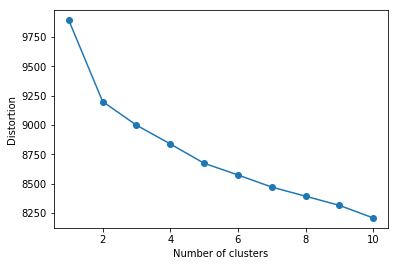

In [16]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vect_df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


## LDA

In [17]:
# create instance of topic modeler
lda = LatentDirichletAllocation(n_components=10, random_state=0)
# fit model to dataset
lda.fit(vect_df)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [18]:
# matrix of documents x topic weights
lda.transform(vect_df)

array([[0.02689783, 0.02689783, 0.53764101, ..., 0.12947671, 0.02689792,
        0.02689783],
       [0.00951085, 0.00951159, 0.0095101 , ..., 0.00951019, 0.00951052,
        0.0095105 ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       ...,
       [0.02946511, 0.02946511, 0.02946571, ..., 0.50813414, 0.02946514,
        0.02946511],
       [0.04142751, 0.04142751, 0.04142751, ..., 0.0414331 , 0.04142893,
        0.04142751],
       [0.03410474, 0.03411269, 0.03410563, ..., 0.03411561, 0.03416004,
        0.03410474]])

In [19]:
# topics and their top words
print_top_words(lda, tf_vectorizer.get_feature_names(), 25)


Topic #0:street common common areas areas work required apartment california areas building post units building company interior inspection date path access common inspected including clean 30 complaint exit pm room

Topic #1:storage 1001hc basement time garage garbage time inspection toilet inspection access provide garages room time reinspection area plumbing permit rooms observed reinspection noted violations restore code complaint inspector

Topic #2:repair bathroom kitchen ceiling room floor damaged replace bedroom water walls unit wall window repair replace hallway sink clean light living area paint shower repair damaged living room

Topic #3:extinguishers common routine common area area routine inspection gate public inspection recharge tag clear date tag date items recharged building annually times safety reminder serviced public areas serviced annually department building

Topic #4:escape apt sec remove ladder rear yard working lead escapes roof service hazard proper 10 demon

## NMF

In [20]:
# create instance of topic modeler
nmf = NMF(n_components=10, random_state=0)
# fit model to dataset
nmf.fit(vect_df)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [21]:
# matrix of documents x topic weights
nmf.transform(vect_df)

array([[0.        , 0.0052409 , 0.        , ..., 0.        , 0.11474717,
        0.        ],
       [0.1723652 , 0.        , 0.00035102, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00214463, 0.00130949, 0.        , ..., 0.00501414, 0.00146026,
        0.00290167],
       [0.        , 0.0046342 , 0.        , ..., 0.00234166, 0.00231085,
        0.00199914],
       [0.        , 0.00223504, 0.        , ..., 0.00679726, 0.        ,
        0.00451017]])

In [22]:
# topics and their top words
print_top_words(nmf, tf_vectorizer.get_feature_names(), 25)


Topic #0:notice reinspection responsibility scheduled attend code section owner property owner section property inspector code accessed inspection specified areas provide violation notice violation owner responsibility inspection specified representative areas cited scheduled notice cited

Topic #1:repair replace repair replace kitchen floor window damaged broken sink missing replace damaged 1001hc light repair damaged bedroom toilet sash replace missing water windows wall deteriorated loose 1001 sfhc

Topic #2:common common areas street areas routine subject property subject violations routine inspection common area inspection property areas building located area public building public common notice notice violation safety violation apartment noted inspection conducted

Topic #3:door roof self lock closer entry door close provide exit closing entry self closing doors latch assistance room outside device gate passageway install adjust repair hc leading

Topic #4:building required work

In [71]:
# topic names
top_dic = {
    0: 'General Inspection 1',
    1: 'Various Room Repairs',
    2: 'General Inspection 2',
    3: 'Entry/Exit',
    4: 'Permits',
    5: 'General Violations 1',
    6: 'General Violations 2',
    7: 'Remidial Instruction',
    8: 'Wall Concerns',
    9: 'Access Concerns'
}

In [72]:
# document x topic weight dataframe 
df_topics = pd.DataFrame(nmf.transform(vect_df))
# map topic name to integers
df_topics.columns = df_topics.columns.map(top_dic)
# reset index to complaint number
df_topics.set_index(df_comments.index, inplace=True)
df_topics.head()

,General Inspection 1,Various Room Repairs,General Inspection 2,Entry/Exit,Permits,General Violations 1,General Violations 2,Remidial Instruction,Wall Concerns,Access Concerns
Complaint Number,,,,,,,,,,
H9603327,0.000000,0.005241,0.000000,0.000000,0.000000,0.003278,0.0,0.000000,0.114747,0.000000
201971003,0.172365,0.000000,0.000351,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
201970841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
201970521,0.004236,0.000000,0.000000,0.000845,0.060171,0.001202,0.0,0.000000,0.000000,0.038216
201969631,0.000000,0.000000,0.000000,0.000000,0.066351,0.000000,0.0,0.023414,0.025564,0.000000


In [73]:
# convert to %
df_topics_perc = df_topics.div(df_topics.sum(axis=1), axis=0)

In [74]:
# sort greatest to least per document
df_topics_perc.sort_values(by=0, axis=1, ascending=False)

KeyError: 0

In [75]:
# array of top topic for each document
top_vec = np.argmax(nmf.transform(vect_df), axis=1)

In [76]:
# map topic array to topic descriptions
np.vectorize(top_dic.get)(top_vec)

array(['Wall Concerns', 'General Inspection 1', 'General Inspection 1',
       ..., 'Entry/Exit', 'Entry/Exit', 'Permits'], dtype='<U20')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

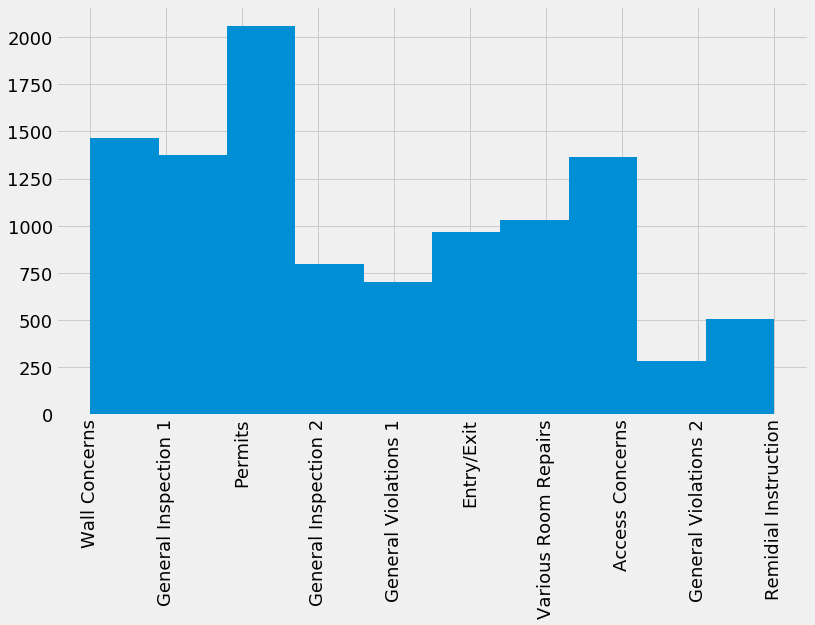

In [77]:
# topic frequency plot
plt.hist(np.vectorize(top_dic.get)(top_vec), bins=10)
plt.xticks(rotation=90)